# Volume 4: Total Variation
    <Name>
    <Class>
    <Date>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Problem 1

Using $20$ $x$ steps, $250$ time steps, $a=-1$, $b=1$, $\alpha = 1$, $\beta=7$, and a final time of $0.2$, plot the solution that minimizes (17.4). It should match figure 17.1.

Difference in iterations is  0.0
Final time =  0.2


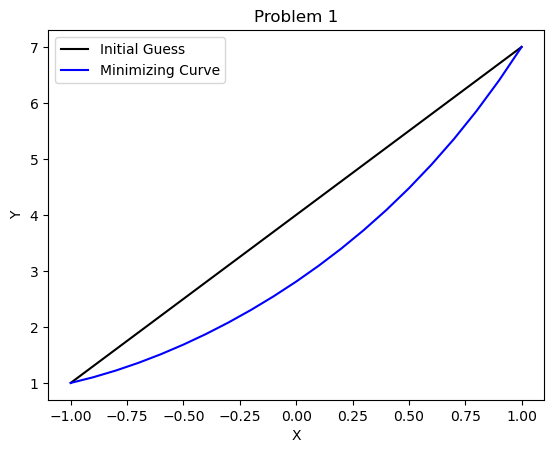

In [7]:
# Define variables
a, b = -1, 1
alpha, beta = 1, 7
x_steps = 20
time_steps = 250
final_T = 0.2

# Get delta_t and delta_x and x0
delta_t, delta_x = final_T/time_steps, (b-a)/x_steps
x0 = np.linspace(a,b,x_steps + 1)

# Check a stabilty condition for this numerical method
if delta_t/delta_x**2 > 0.5:
    print("stability condition fails")

# Initialize u
u = np.empty((2, x_steps + 1))
u[0] = (beta - alpha)/(b-a)*(x0-a) + alpha
u[1] = (beta - alpha)/(b-a)*(x0-a) + alpha

# Plot the initial guess
plt.plot(x0, u[0], label = "Initial Guess", color = 'black')

def rhs(y):
    # Approximate first and second derivatives to second order accuracy
    yp = (np.roll(y,-1) - np.roll(y,1))/(2*delta_x)
    ypp = (np.roll(y,-1) - 2* y + np.roll(y,1))/delta_x**2
    
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= delta_t * (1 + yp[1:-1]**2 - 1*y[1:-1]*ypp[1:-1])
    return y

# Time step until successive iterations are close
iteration = 0
while iteration < time_steps:
    u[1] = rhs(u[1])
    if norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration += 1

# Print data   
print("Difference in iterations is ", norm(np.abs((u[0] - u[1]))))
print("Final time = ", iteration*delta_t)   

# Plot data
plt.plot(x0, u[0], label = "Minimizing Curve", color = 'blue') 
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Problem 1')
plt.legend()
plt.show()

# Problem 2

Using $\Delta t = 1e{-3},$ $\lambda = 40,$ $\Delta x = 1,$ and $\Delta y = 1$, implement the numerical scheme mentioned above to obtain a solution $u$. (So $\Omega = [0,n_x]\times [0,n_y]$, where $n_x$ and $n_y$ represent the number of pixels in the $x$ and $y$ dimensions, respectively.) Take 250 steps in time. Plot the original image as well as the image with noise. Compare your results with Figure 17.3.

In [4]:
# Import needed imports
from numpy.random import randint, uniform, randn
import matplotlib.pyplot as plt
from matplotlib import cm
from imageio import imread, imwrite

# Load in image
imagename = 'balloons_color.jpg'
changed_pixels = 40_000
# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1
IM = imread(imagename, mode = 'L') * (1. / 255)
IM_x, IM_y = IM.shape
# Add in noise
for lost in range(changed_pixels):
    x_, y_ = randint(1, IM_x -2), randint(1, IM_y -2)
    val = .1*randn() + .5
    IM[x_,y_] = max(min(val,1), 0)

/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_19648/3882370253.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  IM = imread(imagename, mode = 'L') * (1. / 255)


Text(0.5, 1.0, 'Problem 2')

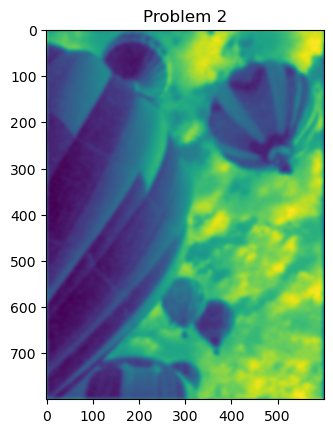

In [23]:
# Initialize parameters
delta_t = 1e-3
lambd = 40
delta_x = 1
delta_y = 1
f = IM
u = f
T_steps = 250

# Run T_steps number of times
for _ in range(T_steps):
    
    # Calculate second derivatives (scaled by delta_x and delta_y)
    u_xx = (np.roll(u, -1, axis = 1) - 2 *u + np.roll(u,1, axis = 1))
    u_yy = (np.roll(u, -1, axis = 0) - 2 * u + np.roll(u,1, axis = 0))
    
    # Calculate u_t
    u_t = -(u-f - lambd * (u_xx + u_yy))
    
    # Update u using the explicit time-stepping formula
    u = u_t * delta_t + u

# Show the image
plt.imshow(u)
plt.title('Problem 2')
    



# Problem 3

Using $\Delta t = 1e-3, \lambda = 1, \Delta x = 1,$ and $ \Delta y = 1$, implement the numerical scheme mentioned above to obtain a solution $u$.  Take 200 steps in time. Display both the diffusion-based and total variaton images of the balloon. Compare your results with
Figure 17.3. How small should ε be?

<function matplotlib.pyplot.show(close=None, block=None)>

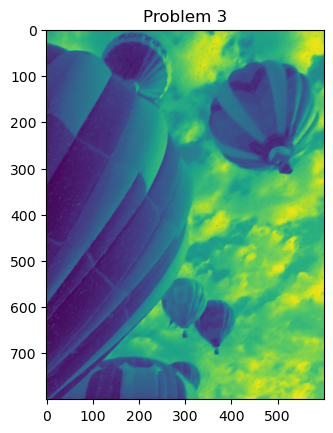

In [33]:
# Initialize parameters
delta_t = 1e-3
lambd = 1
delta_x = 1
delta_y = 1
f = IM
u = f
T_steps = 200
eps = 1e-6
# Run T_steps number of times
for _ in range(T_steps):
    
    # Calculate the derivatives
    u_x = (np.roll(u,-1, axis = 1) - np.roll(u,1, axis = 1))/2
    u_y = (np.roll(u,-1, axis = 0) - np.roll(u,1,axis = 1))/2
    u_xx = np.roll(u,-1, axis = 1) - 2*u + np.roll(u,1,axis = 1)
    u_xy = (np.roll(u_x, -1, axis = 0) - np.roll(u_x, 1, axis = 0))/2
    u_yy = np.roll(u,-1, axis = 0) - 2*u + np.roll(u,1,axis = 0)
    
    u_t = -lambd * (u -f) + (u_xx*u_y**2 + u_yy*u_x**2 - 2*u_x*u_y*u_xy)/((u_x**2 + u_y**2)**(3/2) + eps)
    
    # Update u using the explicit time-stepping formula
    u = u_t * delta_t + u
    
# Show the image
plt.imshow(u)
plt.title("Problem 3")
plt.show



Text(0.5, 1.0, 'Original')

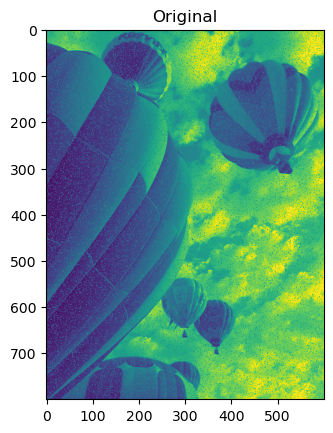

In [30]:
# Plot original
plt.imshow(f)
plt.title('Original')